# Table of Contents

1. [Problem Statement](#Problem-Statement)
2. [Analysis of Jumpan23 in New York City](#Analysis-of-Jumpan23-in-New-York-City)
3. [Recommendations](#Recommendations)
4. [Data Integrity](#Data-Integrity)
5. [Data Integrity Conclusions](#Data-Integrity-Conclusions)

# Problem Statement

This notebook has been created to give an analysis of the data from Jumpman23's New York City operation. Specifically, it will address the current performance of Jumpman23 in NYC, make recommendations on how to expand the operation by 20% in two months, and diagnose data integrity issues.

# Analysis of Jumpan23 in New York City

Here is a snippet of the raw data:

In [712]:
import pandas as pd

df = pd.read_csv('/Users/jakecasey/Desktop/Jumpman23/analyze_me.csv')

df.head(5)

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff
0,1457973,327168,162381,van,Melt Shop,American,Lemonade,1.0,Beverages,00:19:58.582052,40.744607,-73.990742,40.752073,-73.985370,2014-10-26 13:51:59.898924,NaN,NaN,2014-10-26 14:52:06.313088
1,1377056,64452,104533,bicycle,Prince Street Pizza,Pizza,Neapolitan Rice Balls,3.0,Munchables,00:25:09.107093,40.723080,-73.994615,40.719722,-73.991858,2014-10-16 21:58:58.65491,2014-10-16 22:26:02.120931,2014-10-16 22:48:23.091253,2014-10-16 22:59:22.948873
2,1476547,83095,132725,bicycle,Bareburger,Burger,Bare Sodas,1.0,Drinks,00:06:44.541717,40.728478,-73.998392,40.728606,-73.995143,2014-10-28 21:39:52.654394,2014-10-28 21:37:18.793405,2014-10-28 21:59:09.98481,2014-10-28 22:04:40.634962
3,1485494,271149,157175,bicycle,Juice Press,Juice Bar,OMG! My Favorite Juice!,1.0,Cold Pressed Juices,NaN,40.738868,-74.002747,40.751257,-74.005634,2014-10-30 10:54:11.531894,2014-10-30 11:04:17.759577,2014-10-30 11:16:37.895816,2014-10-30 11:32:38.090061
4,1327707,122609,118095,bicycle,Blue Ribbon Sushi,Japanese,Spicy Tuna & Tempura Flakes,2.0,Maki (Special Rolls),00:03:45.035418,40.726110,-74.002492,40.709323,-74.015867,2014-10-10 00:07:18.450505,2014-10-10 00:14:42.702223,2014-10-10 00:25:19.400294,2014-10-10 00:48:27.150595


In [720]:
print("There are " + str(df.shape[0]) + " rows and " + str(df.shape[1]) + " columns in the dataset.")

There are 5983 rows and 18 columns in the dataset.


Since the columns 'when_the_Jumpman_arrived_at_pickup' and 'when_the_Jumpman_left_pickup' both have NaN values (signifying missing values) in the first row, it is already apparent that there are integrity issues with this dataset. To perform some aspects of this analysis, I had to remove these missing values. More detail can be found: [Data Integrity](#Data-Integrity)

By taking the first and last delivery dates, I was able to find that our dataset covers 30 days:

In [704]:
df2 = df.copy()
print('The first order was made at: ' + str(min(df2['when_the_delivery_started'])))
print('The last order was made at: ' + str(max(df2['when_the_delivery_started'])))

The first order was made at: 2014-10-01 00:07:58.632482
The last order was made at: 2014-10-30 23:08:43.4819


In those 30 days, 578 unique Jumpmen facilitated the transaction of 5,933 items (excluding missing data) over 5,983 deliveries to 3,192 unique customers.

In [707]:
item_quantity_column = df2['item_quantity'].dropna()
print('Items: ' + str(int(sum(item_quantity_column))))

delivery_id_count = df2['delivery_id'].count()
print('Deliveries: ' + str(delivery_id_count))

customer_id_count = df2['customer_id'].nunique()
print('Unique customers: ' + str(customer_id_count))

jumpman_id_count = df2['jumpman_id'].nunique()
print('Unique jumpmen: ' + str(jumpman_id_count))

Items: 5933
Deliveries: 5983
Unique customers: 3192
Unique jumpmen: 578


The average time it took to place an order was about 7 minutes and 20 seconds, with the quickest order taking 1 minute and the longest taking 73 minutes. 75% of all orders were placed within 9 minutes of request, and 95% within 18 minutes.

In [721]:
from datetime import datetime
how_long_it_took_to_order_column = df['how_long_it_took_to_order'].dropna()
how_long_it_took_to_order_column = how_long_it_took_to_order_column.apply(lambda x: datetime.strptime(x, '%H:%M:%S.%f'))
how_long_it_took_to_order_column = how_long_it_took_to_order_column.dt.floor('Min')
how_long_it_took_to_order_column = how_long_it_took_to_order_column.dt.time

minute_list = [t.minute + (t.hour*60) for t in how_long_it_took_to_order_column]
how_long_it_took_to_order_column_minutes = pd.DataFrame(minute_list,columns=['Duration'])
how_long_it_took_to_order_column_minutes.describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95])

,Duration
count,3038.000000
mean,7.321264
std,5.657857
min,1.000000
25%,4.000000
50%,6.000000
75%,9.000000
90%,14.000000
95%,18.000000
max,73.000000


Visually:

Text(0.5, 1.0, 'Distribution of Order Times')

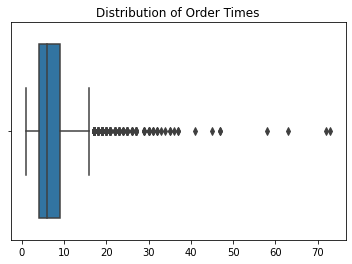

In [722]:
import seaborn as sns
sns.boxplot(x=how_long_it_took_to_order_column_minutes).set_title('Distribution of Order Times')

On average, Jumpmen took almost 15 minutes to pickup the order after the deliveries' start. Although, there are clearly data integrity issues in this data set, since the minimum difference between 'when_the_jumpman_arrived_at_pickup' and 'when_the_delivery_started' is negative.

In [723]:
df2 = df.copy()
df2 = df2.dropna()

df2['when_the_Jumpman_arrived_at_pickup'] = df2['when_the_Jumpman_arrived_at_pickup'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f'))
df2['when_the_delivery_started'] = df2['when_the_delivery_started'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f'))

df2['time_to_pickup'] = df2['when_the_Jumpman_arrived_at_pickup'] - df2['when_the_delivery_started']
df2['time_to_pickup'].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95])

count                        2279
mean       0 days 00:14:48.206291
std        0 days 00:12:29.490084
min      -1 days +23:57:20.921228
25%        0 days 00:05:24.797145
50%        0 days 00:12:53.666399
75%        0 days 00:22:05.616648
90%        0 days 00:30:41.306352
95%        0 days 00:37:27.192117
max        0 days 01:25:28.921390
Name: time_to_pickup, dtype: object

On average, Jumpmen took a little over 14 minutes to arrive at the dropoff location after leaving the pickup location.

In [724]:
df2['when_the_Jumpman_arrived_at_dropoff'] = df2['when_the_Jumpman_arrived_at_dropoff'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f'))
df2['when_the_Jumpman_left_pickup'] = df2['when_the_Jumpman_left_pickup'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f'))

df2['time_to_deliver'] = df2['when_the_Jumpman_arrived_at_dropoff'] - df2['when_the_Jumpman_left_pickup']
df2['time_to_deliver'].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95])

count                      2279
mean     0 days 00:14:12.587547
std      0 days 00:08:27.352523
min      0 days 00:00:56.146730
25%      0 days 00:08:29.441424
50%      0 days 00:12:08.484819
75%      0 days 00:17:22.089868
90%      0 days 00:25:21.482513
95%      0 days 00:30:33.651286
max      0 days 01:36:31.812340
Name: time_to_deliver, dtype: object

On average, from delivery start to delivery finish, Jumpmen took nearly 47 minutes to deliver items. 95% of deliveries were completed in 1 hour and 17 minutes.

In [725]:
df2['time_total'] = df2['when_the_Jumpman_arrived_at_dropoff'] - df2['when_the_delivery_started']
df2['time_total'].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95])

count                      2279
mean     0 days 00:46:43.079799
std      0 days 00:16:21.392851
min      0 days 00:11:32.601514
25%      0 days 00:34:54.454417
50%      0 days 00:44:05.406502
75%      0 days 00:55:25.044945
90%      0 days 01:07:28.242859
95%      0 days 01:17:26.181931
max      0 days 02:45:50.043703
Name: time_total, dtype: object

The fastest methods of transportation were Bicycle, Motorcycle, and Scooter, while Walkers, Cars, Vans, and Trucks were slower.

In [727]:
df2['total_transit_time'] = df2['time_to_pickup'] + df2['time_to_deliver']
df2['total_transit_time'].mean()
df_bicycle = df2[df2['vehicle_type']=='bicycle']
df_car = df2[df2['vehicle_type']=='car']
df_motorcycle = df2[df2['vehicle_type']=='motorcycle']
df_scooter = df2[df2['vehicle_type']=='scooter']
df_truck = df2[df2['vehicle_type']=='truck']
df_van = df2[df2['vehicle_type']=='van']
df_walker = df2[df2['vehicle_type']=='walker']

df_bicycle_mean = df_bicycle['total_transit_time'].mean()
df_car_mean = df_car['total_transit_time'].mean()
df_motorcycle_mean = df_motorcycle['total_transit_time'].mean()
df_scooter_mean = df_scooter['total_transit_time'].mean()
df_truck_mean = df_truck['total_transit_time'].mean()
df_van_mean = df_van['total_transit_time'].mean()
df_walker_mean = df_walker['total_transit_time'].mean()

print('Bicycle transit time: ' + str(df_bicycle_mean))
print('Car transit time: ' + str(df_car_mean))
print('Motorcycle transit time: ' + str(df_motorcycle_mean))
print('Scooter transit time: ' + str(df_scooter_mean))
print('Truck transit time: ' + str(df_truck_mean))
print('Van transit time: ' + str(df_van_mean))
print('Walker transit time: ' + str(df_walker_mean))

Bicycle transit time: 0 days 00:26:55.261424
Car transit time: 0 days 00:34:25.789056
Motorcycle transit time: 0 days 00:28:21.905217
Scooter transit time: 0 days 00:29:35.531506
Truck transit time: 0 days 00:47:40.596227
Van transit time: 0 days 00:32:04.990496
Walker transit time: 0 days 00:33:00.590895


Most delivery pickup locations were in Lower and Midtown Manhattan:

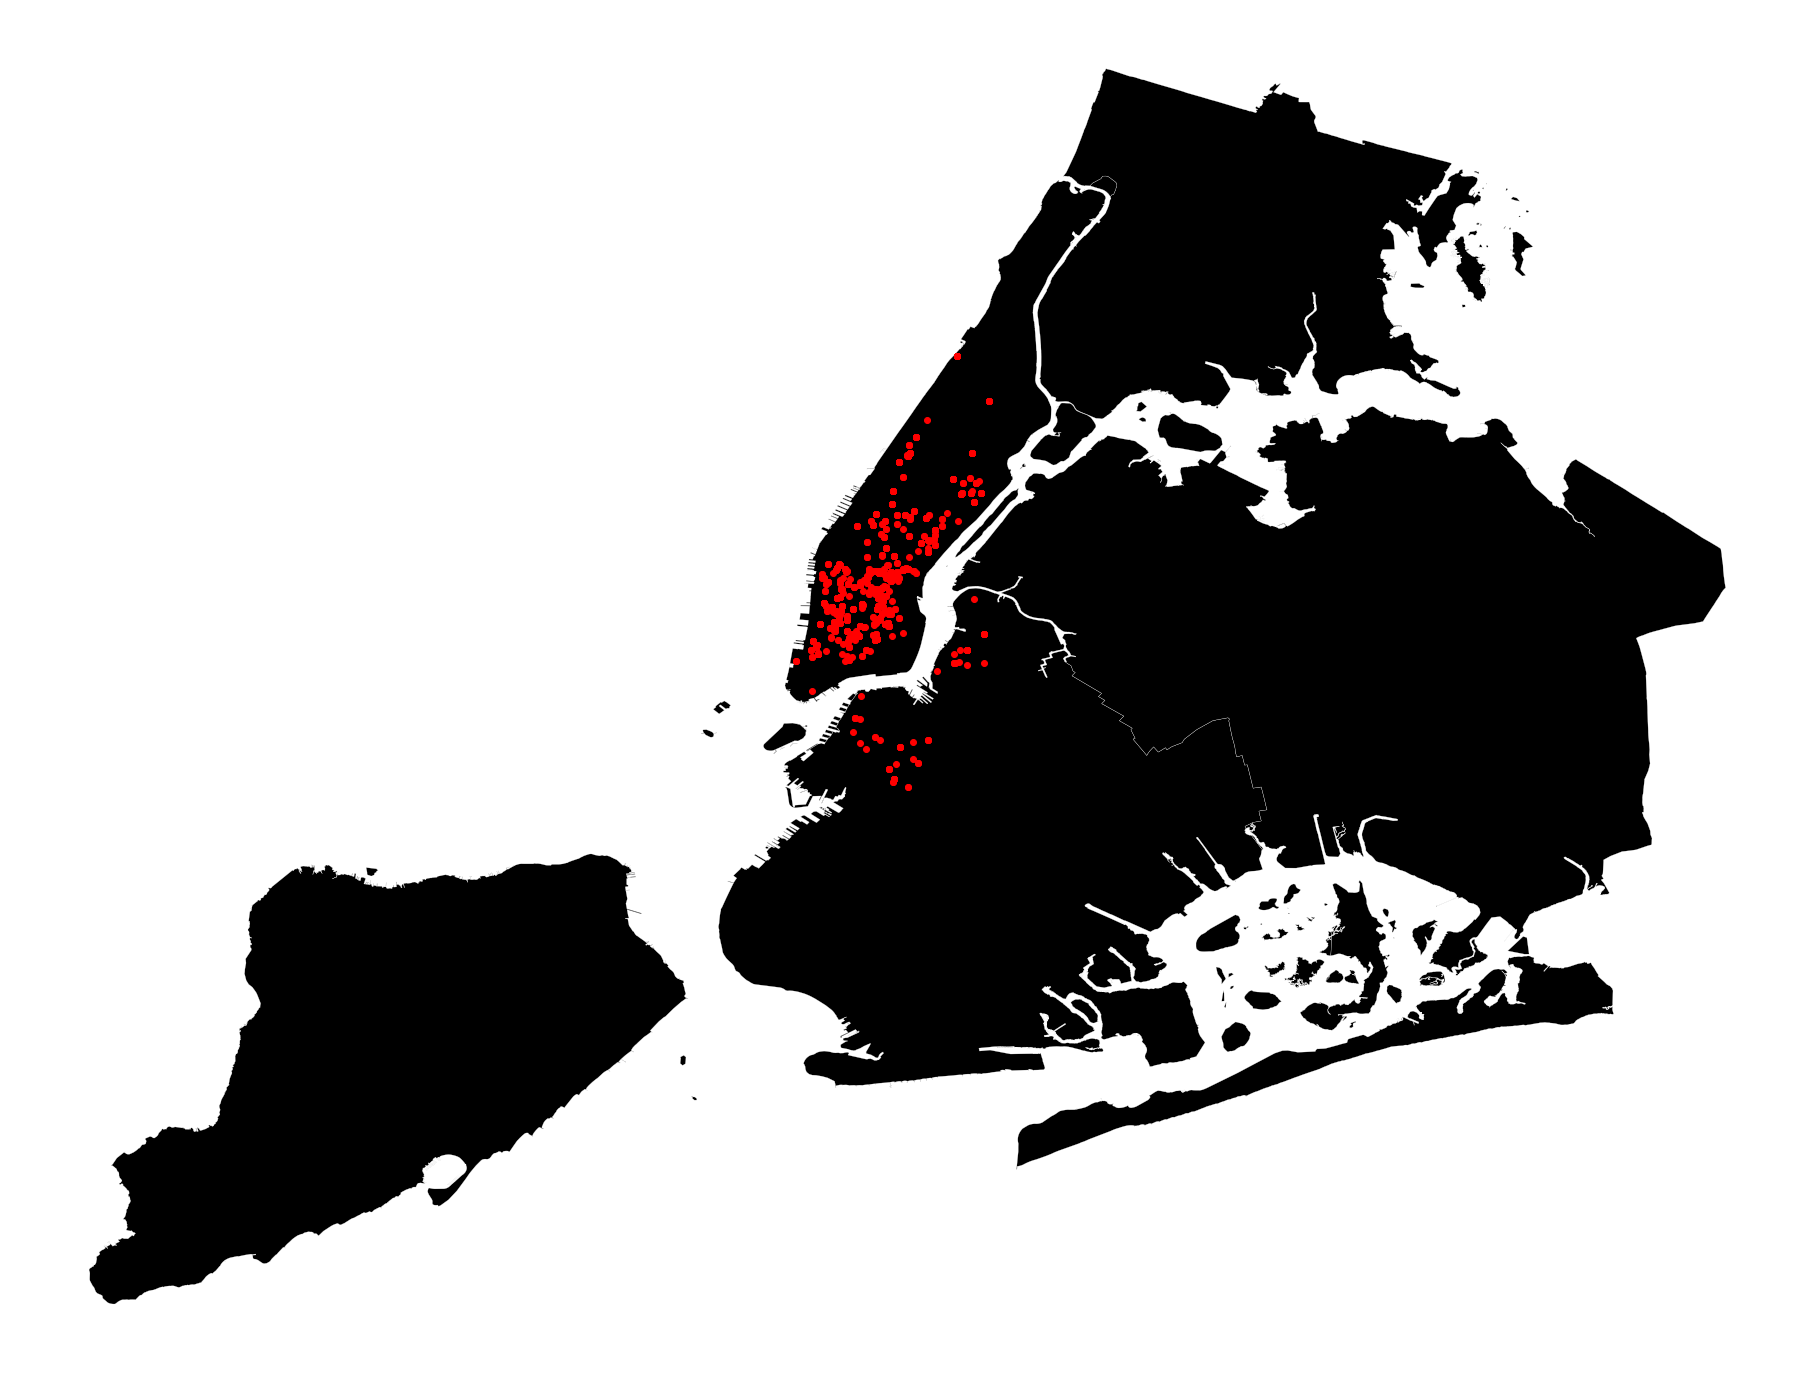

In [728]:
import geopandas as gpd

gdf = gpd.GeoDataFrame(df2, geometry=gpd.points_from_xy(df2.pickup_lon, df2.pickup_lat))

world = gpd.read_file(gpd.datasets.get_path('nybb'))

ax = street_map.to_crs(epsg=4326).plot(figsize=(100,25), linewidth=0.25, edgecolor='white', color='black')
ax.axis('off')

gdf.plot(ax=ax, color='red')

Most delivery dropoff locations were in Lower and Midtown Manhattan, with some in Uptown Manhattan, Brooklyn, and very few in Queens:

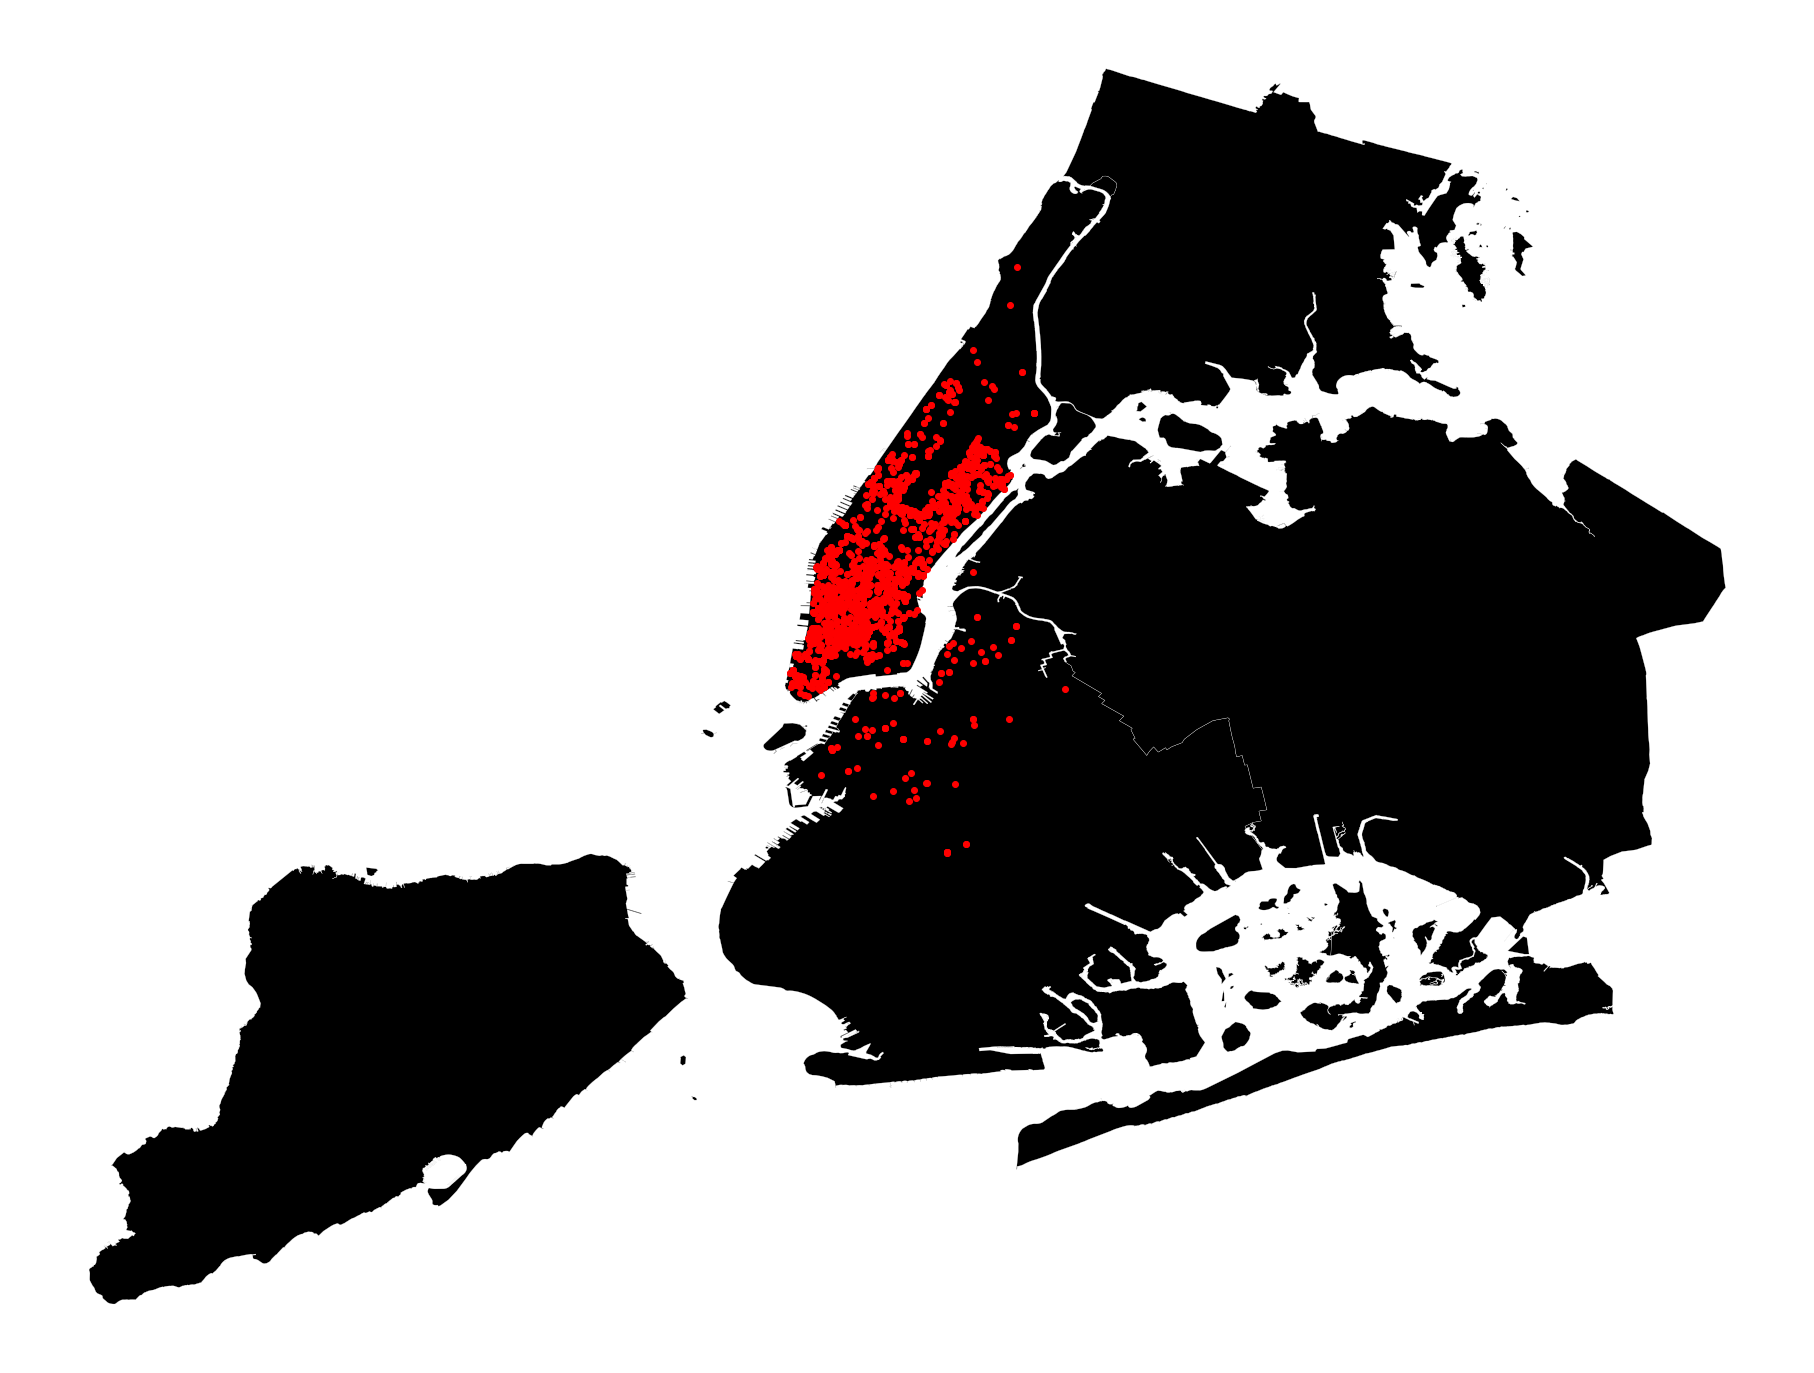

In [729]:
gdf = gpd.GeoDataFrame(df2, geometry=gpd.points_from_xy(df2.dropoff_lon, df2.dropoff_lat))

world = gpd.read_file(gpd.datasets.get_path('nybb'))

ax = street_map.to_crs(epsg=4326).plot(figsize=(100,25), linewidth=0.25, edgecolor='white', color='black')
ax.axis('off')

gdf.plot(ax=ax, color='red')

# Recommendations

In order to expand Jumpman23's New York City operation by 20%, we need to first establish what 20% expansion means. Since this dataset doesn't contain profit or revenue information, I thought the best metric for expansion would be number of deliveries. To expand deliveries 20% in two months, Jumpman23 would need to reach 7,179 deliveries per month:

In [730]:
target_deliveries_count = int((delivery_id_count * (1.2)))
target_deliveries_count

7179

Using [Analysis of Jumpan23 in New York City](#Analysis-of-Jumpan23-in-New-York-City), there are several ways in which this could be accomplished:

1. Encourage adoption of Jumpman23 in other parts of New York City. 
    
The vast majority of Jumpman23 usage is in Lower and Midtown Manhattan, thus there is plenty of room for expansion in the other boroughs and Uptown Manhattan.
    
2. Decrease the time it takes to receive a delivery.

From start to finish, Jumpmen average about 47 minutes to complete a delivery. This actually seems pretty impressive given the variability in items, stores, and locations that Jumpmen have to service. 45 minutes is considered a good delivery time in the pizza industry, which is much more standardized, so 47 minutes is a good achievement.
    
However, the sooner items are delivered, the sooner Jumpmen can move on to another delivery. Also, quicker deliveries will create a more content user base and encourage more usage. So, further decreasing delivery time is a goal worth achieving.

The average time it takes to order requested items is over 7 minutes. This could be significantly reduced if Jumpman23 technology was better employed to order items automatically.

Also, some forms of transportation were superior to others. Deliveries were made faster with smaller vehicles like Bicycles, Motorcycles, and Scooters. This is likely due to the high traffic in Manhattan. So expanding, the usage of small vehicles in high traffic areas will reduce delivery time.

# Data Integrity

I found 16 duplicate rows in the original dataset.

In [731]:
df2 = df.copy()
df2 = df2.drop_duplicates()
duplicated_Orders = df.shape[0] - df2.shape[0]
duplicated_Orders

16

I found 7 columns with a total of 8,614 missing values.

In [732]:
column_list = []
nan_count_list = []

nan_count = 0

for column in df2.columns:
    columns_with_nan = df2[pd.isnull(df2[column])]
    index = columns_with_nan.index
    number_of_rows = len(index)
    
    column_list.append(column)
    nan_count_list.append(number_of_rows)
    
    nan_count += number_of_rows
    
df_nan = pd.DataFrame({'Column Name' : column_list, 'Missing Values Count' : nan_count_list})
df_nan[df_nan['Missing Values Count']!=0].sort_values('Missing Values Count', ascending=False)

,Column Name,Missing Values Count
9,how_long_it_took_to_order,2941
6,item_name,1230
7,item_quantity,1230
8,item_category_name,1230
5,place_category,883
15,when_the_Jumpman_arrived_at_pickup,550
16,when_the_Jumpman_left_pickup,550


In [733]:
print('Total Missing Values: ' + str(nan_count))

Total Missing Values: 8614


I confirmed that are not obvious errors in the identification fields ('delivery_id', 'customer_id', 'jumpman_id') by looking for outliers.

Text(0.5, 1.0, 'delivery_id boxplot')


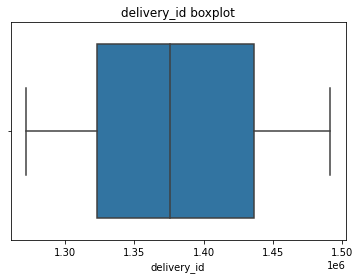

In [734]:
print(sns.boxplot(x=df['delivery_id']).set_title('delivery_id boxplot'))

Text(0.5, 1.0, 'customer_id boxplot')


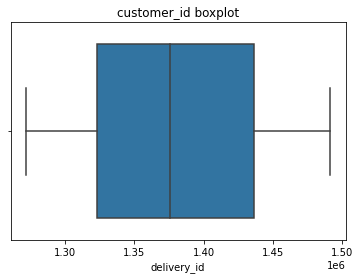

In [735]:
print(sns.boxplot(x=df['delivery_id']).set_title('customer_id boxplot'))

Text(0.5, 1.0, 'jumpman_id boxplot')


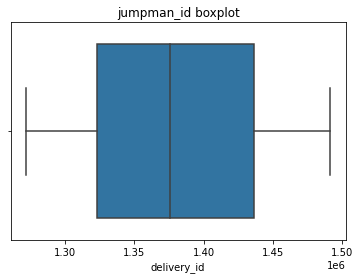

In [736]:
print(sns.boxplot(x=df['delivery_id']).set_title('jumpman_id boxplot'))

I confirmed that there were not misspellings or clear entry errors in 'vehicle_type', 'place_category', and 'item_quantity'. The column 'pickup_place', 'item_name', and 'item_category_name' had too many unique values to easily verify that there were no data errors.

In [737]:
print(df2['vehicle_type'].sort_values().unique())

['bicycle' 'car' 'motorcycle' 'scooter' 'truck' 'van' 'walker']


In [738]:
print(df2['pickup_place'].sort_values().unique())

[' Il Mulino New York' '$10 Blue Ribbon Fried Chicken Sandwich' "'Essen"
 "'wichcraft" '11th Street Cafe' '12 Chairs' '143 Reade Street' '158'
 '16 East 11th street' '16 Handles' '16 Handles - Chelsea'
 '16 Handles - East Village' '16 Handles - Murray Hill'
 '16 Handles - UES 2nd Ave' '16 Handles - UWS Amsterdam'
 '16 Handles - UWS Broadway' '177 East 75th St' '220 East 23rd Street'
 '24 Central Park South' '25 Broadway' '29 w 57th st' '299 East 11th Nyc'
 '2nd Ave Deli' '3 Guys' '3 Guys Restaurant' '30 Wall Street'
 '300 East 85th, America' '300 North End Ave and Warren' '384 Broome St'
 '400 Fifth Avenue' '420 East 72nd St.' '456 Shanghai Cuisine'
 '460 park ave south' '5 Napkin Burger' '511 East 80th St' '514 w 24th St'
 '655 Park Avenue' '67 Burger' '7-Eleven' '86 Street Photo'
 'A Matter Of Health' 'A Salt & Battery' 'AG Kitchen' 'ALJO Mfg. Co.'
 'AMC Loews Kips Bay 15' 'Abracadabra NYC' 'Absolute Bagel'
 'Adams Tobacco' "Adrienne's Pizza Bar" 'Agata & Valentina Market'
 'Alidoro'

In [739]:
print(df2['place_category'].sort_values().unique())

['African' 'American' 'Art Store' 'Asian' 'BBQ' 'Bakery' 'Beauty Supply'
 'Book Store' 'Breakfast' 'Burger' 'Caribbean' 'Chinese' 'Clothing'
 'Coffee' 'Convenience Store' 'Deli' 'Department Store' 'Dessert' 'Donut'
 'Drug Store' 'Eastern European' 'Electronics Store' 'Fast Food'
 'Food Truck' 'French' 'German' 'Gluten-Free' 'Grocery Store' 'Ice Cream'
 'Indian' 'Italian' 'Japanese' 'Juice Bar' 'Kids & Baby' 'Korean'
 'Mediterranean' 'Mexican' 'Middle Eastern' 'Office Supplies Store'
 'Pet Supplies Store' 'Pizza' 'Promo' 'Restaurant' 'Russian' 'Salad'
 'Seafood' 'Shop' 'South American' 'Southern' 'Spanish' 'Specialty Store'
 'Steak' 'Sushi' 'Thai' 'Vegan' 'Vegetarian' 'Vietnamese' nan]


In [740]:
print(df2['item_name'].sort_values().unique())

['"Ala Vodka" Sauce with Mushrooms' '"Lure Style" Burger' '"The Cadillac"'
 ... 'iced Tea' '‘Pac Man’ Shrimp Dumplings (4)' nan]


In [741]:
df['item_quantity'].value_counts()

1.0     3980
2.0      570
3.0      112
4.0       54
6.0       14
5.0       13
8.0        4
15.0       3
16.0       1
12.0       1
7.0        1
Name: item_quantity, dtype: int64

In [742]:
print(df2['item_category_name'].sort_values().unique())

['10" Pies' '18" Pizzas' '6" Cakes' 'A La Carte'
 'A La Carte Sushi & Sashimi' 'A La Carte Sushi or Sashimi' 'A la Cart'
 'Acai Bowls' 'Accompaniments' 'Additional Appetizers' 'Additional Sauces'
 'Air Fresheners' 'All Day Brunch' 'All Day Specials' 'Anticuchos'
 'Antipasti' 'Antipasti (Appetizers)' 'Antipasti (dinner)'
 'Antipasti Lunch' 'Appetizer' 'Appetizers' 'Appetizers & Finger Foods'
 'Appetizers & Salads' 'Appetizers & Side Orders' 'Appetizers (Aagaz)'
 'Appetizers (dinner)' 'Arepas' 'Asian  Foods' 'BBQ' 'BBQ Platters'
 'Bagel Sandwiches' 'Bagel Type' 'Bagelry' 'Bagels' 'Bagels Mood'
 'Baking Dough & Mixes' 'Baking Soda & Starch' 'Bamboo Specials'
 'Barbecue Combination' 'Bare Salads' 'Bare Sides' 'Bare Snacks'
 'Bareburgers' 'Basmati Degh Rice' 'Bastilla' 'Bath & Shower Products'
 'Beer' 'Beer & Coolers' 'Beverages' 'Big Salads' 'Biscuit Sandwiches'
 'Blintzes' 'Boisson Chauds' 'Bolied' 'Bordeaux Blend'
 'Boston Carver Sandwiches' 'Botanas' 'Bottled Drinks' 'Bottled Water'
 'B

I confirmed that there weren't obvious errors in the time value columns by verifying that the max and min values fell within a normal range:

In [743]:
how_long_it_took_to_order_without_nan = df2['how_long_it_took_to_order'].dropna()
print("Max of 'how_long_it_took_to_order': " + str(max(how_long_it_took_to_order_without_nan)))
print("Min of 'how_long_it_took_to_order': " + str(min(how_long_it_took_to_order_without_nan)))

when_the_delivery_started_without_nan = df2['when_the_delivery_started'].dropna()
print("Max of 'when_the_delivery_started': " + str(max(when_the_delivery_started_without_nan)))
print("Min of 'when_the_delivery_started': " + str(min(when_the_delivery_started_without_nan)))

when_the_Jumpman_arrived_at_pickup_without_nan = df2['when_the_Jumpman_arrived_at_pickup'].dropna()
print("Max of 'when_the_Jumpman_arrived_at_pickup': " + str(max(when_the_Jumpman_arrived_at_pickup_without_nan)))
print("Min of 'when_the_Jumpman_arrived_at_pickup': " + str(min(when_the_Jumpman_arrived_at_pickup_without_nan)))

when_the_Jumpman_left_pickup_without_nan = df2['when_the_Jumpman_left_pickup'].dropna()
print("Max of 'when_the_Jumpman_left_pickup': " + str(max(when_the_Jumpman_arrived_at_pickup_without_nan)))
print("when_the_Jumpman_left_pickup': " + str(min(when_the_Jumpman_left_pickup_without_nan)))

when_the_Jumpman_arrived_at_dropoff_without_nan = df2['when_the_Jumpman_arrived_at_dropoff'].dropna()
print("Max of 'when_the_Jumpman_arrived_at_dropoff': " + str(max(when_the_Jumpman_arrived_at_dropoff_without_nan)))
print("when_the_Jumpman_arrived_at_dropoff': " + str(min(when_the_Jumpman_arrived_at_dropoff_without_nan)))

Max of 'how_long_it_took_to_order': 01:13:13.266118
Min of 'how_long_it_took_to_order': 00:01:22.997519
Max of 'when_the_delivery_started': 2014-10-30 23:08:43.4819
Min of 'when_the_delivery_started': 2014-10-01 00:07:58.632482
Max of 'when_the_Jumpman_arrived_at_pickup': 2014-10-30 23:10:31.062088
Min of 'when_the_Jumpman_arrived_at_pickup': 2014-10-01 00:39:31.086322
Max of 'when_the_Jumpman_left_pickup': 2014-10-30 23:10:31.062088
when_the_Jumpman_left_pickup': 2014-10-01 00:59:57.522402
Max of 'when_the_Jumpman_arrived_at_dropoff': 2014-10-30 23:29:44.866438
when_the_Jumpman_arrived_at_dropoff': 2014-10-01 00:30:21.109149


I confirmed that there are not obvious errors in longitude and latitude data by mapping the pickup and delivery locations. Those maps are in [Analysis of Jumpan23 in New York City](#Analysis-of-Jumpan23-in-New-York-City).

There are 169 errors where the Jumpman is listed as arrived at pickup before the delivery even started:

In [744]:
df2 = df.copy()
df2 = df2.dropna()

df2['when_the_Jumpman_arrived_at_pickup'] = df2['when_the_Jumpman_arrived_at_pickup'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f'))
df2['when_the_delivery_started'] = df2['when_the_delivery_started'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f'))

df2['time_to_pickup'] = df2['when_the_Jumpman_arrived_at_pickup'] - df2['when_the_delivery_started']

print(abs(df2['time_to_pickup'].dt.days.sum()))

169


I confirmed that all dropoff times are after pickup times:

In [745]:
df2 = df.copy()
df2 = df2.dropna()

df2['when_the_Jumpman_arrived_at_dropoff'] = df2['when_the_Jumpman_arrived_at_dropoff'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f'))
df2['when_the_Jumpman_left_pickup'] = df2['when_the_Jumpman_left_pickup'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f'))

df2['time_to_pickup'] = df2['when_the_Jumpman_arrived_at_dropoff'] - df2['when_the_Jumpman_left_pickup']

print(abs(df2['time_to_pickup'].dt.days.sum()))

0


# Data Integrity Conclusions

There were three major errors in the data:
1. 8,614 missing data entries over 7 columns of data.
    
This is a big concern considering that there are only 5983 rows of data. But, with accurate data, the only recommendation that may change is which vehicle types are fastest.

2. 16 duplicate rows.

This is very unlikely to significantly impact the analysis.

3. 169 delivery start times were listed as after the Jumpman had already arrived for pickup. 

These make the order times look better than they should. In reality, average order time is worse than 7 minutes and 20 seconds, meaning there is even more incentive to automate ordering using Jumpman23.